# 🧭 Exploratory Data Analysis (EDA) with Pandas & Matplotlib

Exploratory Data Analysis (EDA) allows us to understand a dataset before applying any models. In this section, we will see how to use **pandas** and **matplotlib** to:

- Check for missing values
- Understand distributions
- Analyze relationships between variables

## 1. Loading the Dataset (again, Titanic dataset)

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Load dataset from Seaborn
import seaborn as sns
df = sns.load_dataset("titanic")

# First view of the data
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


## 2. General exploration using Pandas

In [2]:
# Show dimensions and data types
print(f"Shape: {df.shape}")
print(df.dtypes)

# General info: cols, data types and non-null count
df.info()

# Descriptive stats including numerical and categorical variables
df.describe(include='all')

Shape: (891, 15)
survived          int64
pclass            int64
sex              object
age             float64
sibsp             int64
parch             int64
fare            float64
embarked         object
class          category
who              object
adult_male         bool
deck           category
embark_town      object
alive            object
alone              bool
dtype: object
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null 

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
count,891.000000,891.000000,891,714.000000,891.000000,891.000000,891.000000,889,891,891,891,203,889,891,891
unique,NaN,NaN,2,NaN,NaN,NaN,NaN,3,3,3,2,7,3,2,2
top,NaN,NaN,male,NaN,NaN,NaN,NaN,S,Third,man,True,C,Southampton,no,True
freq,NaN,NaN,577,NaN,NaN,NaN,NaN,644,491,537,537,59,644,549,537
mean,0.383838,2.308642,NaN,29.699118,0.523008,0.381594,32.204208,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,0.486592,0.836071,NaN,14.526497,1.102743,0.806057,49.693429,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,0.000000,1.000000,NaN,0.420000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,0.000000,2.000000,NaN,20.125000,0.000000,0.000000,7.910400,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,0.000000,3.000000,NaN,28.000000,0.000000,0.000000,14.454200,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,1.000000,3.000000,NaN,38.000000,1.000000,0.000000,31.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
# Missing values per column
df.isnull().sum()

,0
survived,0
pclass,0
sex,0
age,177
sibsp,0
parch,0
fare,0
embarked,2
class,0
who,0


> We observe columns like `age`, `embarked`, and `deck` with missing values that we need to address before modeling.


## 3. Analyzing variables


A. Categorical variables

In [4]:
# Ideas: typos, value frequencies, missing values, ...

# Compare sex frequencies
print(df['sex'].value_counts())

# Calculate the percentage of possible embarked options
df['embarked'].value_counts(normalize=True) * 100

sex
male      577
female    314
Name: count, dtype: int64


,proportion
embarked,
S,72.440945
C,18.897638
Q,8.661417



B. Numerical variables

In [5]:
# Ideas: mean, standard deviation, min/max, outliers, missing values, ... (useful: df.describe())

# Basic stats
print(df[['age', 'fare']].describe())

# Interquartile range (IQR) method to detect outliers: it describes the 50% central spread of a data set
q1 = df['fare'].quantile(0.25)
q3 = df['fare'].quantile(0.75)
iqr = q3 - q1
outliers = df[(df['fare'] < q1 - 1.5 * iqr) | (df['fare'] > q3 + 1.5 * iqr)]
outliers.shape # We have detected 116 outlier values in the 'fare' field.

              age        fare
count  714.000000  891.000000
mean    29.699118   32.204208
std     14.526497   49.693429
min      0.420000    0.000000
25%     20.125000    7.910400
50%     28.000000   14.454200
75%     38.000000   31.000000
max     80.000000  512.329200


(116, 15)

## 4. Visualizations using MatPlotlib

**Histogram:**
What does it show?

The distribution of a numerical variable. It displays the frequency of values divided into “bins” or intervals.

What is it useful for?

* To see if the data is normally distributed (bell-shaped curve)
* To identify asymetries (skewed distributions)
* To detect outliers if there are long tails or extreme values

> "Most Titanic passengers were between 20 and 40 years old. There were few kids or elderly people."

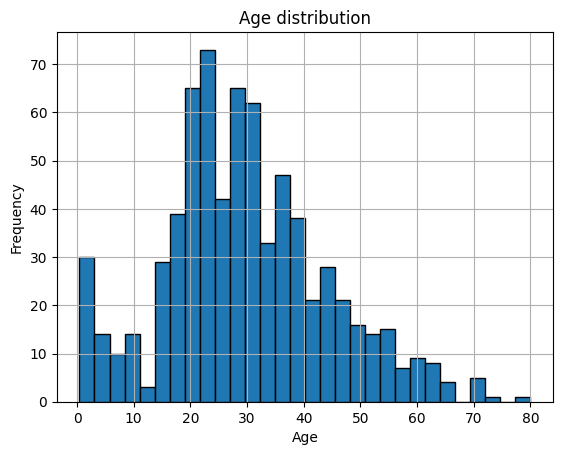

In [6]:
# Age histogram
plt.hist(df['age'].dropna(), bins=30, edgecolor='black')
plt.title("Age distribution")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()

**Bar chart (grouped or stacked):** What does it show?

Comparison of quantities between categories (such as sex or class) and another categorical variable (such as survived or not).

What is it useful for?

* Comparing absolute frequencies
* Observing trends or differences between groups

> "More women survived than men, even though there were twice as many men."

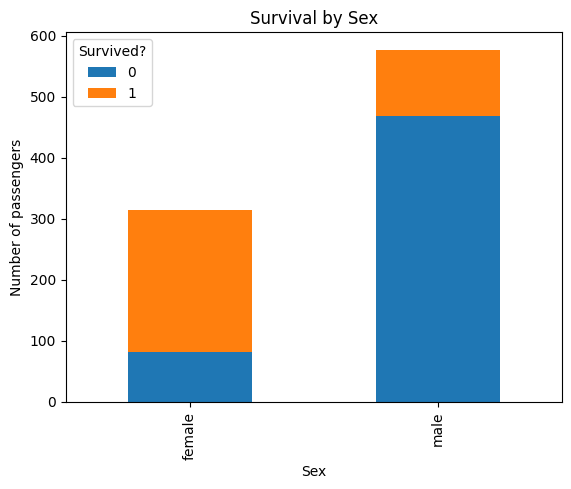

In [7]:
# Bar chart: survival by sex
df_sex_survived = df.groupby('sex')['survived'].value_counts().unstack()
df_sex_survived.plot(kind='bar', stacked=True)
plt.title("Survival by Sex")
plt.xlabel("Sex")
plt.ylabel("Number of passengers")
plt.legend(title="Survived?")
plt.show()

**Boxplot:** What does it show?

Median, quartiles, interquartile range, and outliers of a numerical variable. It can be grouped by categories.

What is it useful for?

* Comparing the distribution of a numerical variable across groups
* Seeing internal variability and identifying outliers

> “First-class passengers paid significantly more than those in second or third class, and there are many high-fare outliers.”

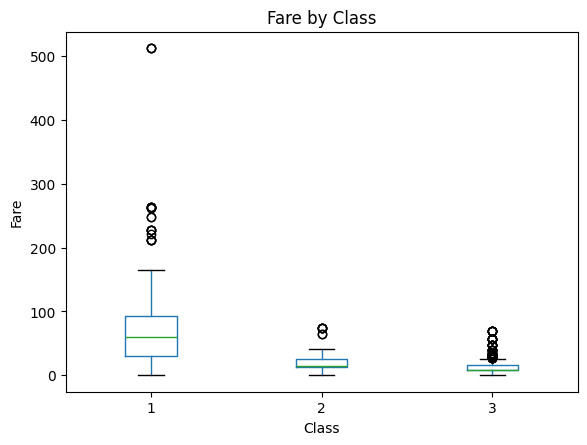

In [8]:
# Boxplot of fares by class
df.boxplot(column='fare', by='pclass', grid=False)
plt.title("Fare by Class")
plt.suptitle("")
plt.xlabel("Class")
plt.ylabel("Fare")
plt.show()

**Pie chart:** What does it show?

Relative proportions (%) of a categorical variable. Sometimes a bar chart is more visually accurate.

What is it useful for?

* Showing how the total is divided among categories
* Best used when there are few categories (2 to 5 max)

> “Most passengers boarded in Southampton, with fewer in Cherbourg or Queenstown.”

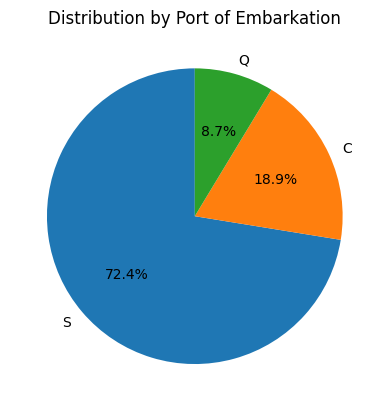

In [9]:
# Pie chart of embarkation
embarked_counts = df['embarked'].value_counts()
plt.pie(embarked_counts, labels=embarked_counts.index, autopct='%1.1f%%', startangle=90)
plt.title("Distribution by Port of Embarkation")
plt.show()

**Correlation heatmap:** What does it show?

Correlations between numerical variables (how strongly they are related).

What is it useful for?

* Detecting multicollinearity
* Selecting relevant variables
* Discovering unexpected relationships

> “Age and fare are not correlated. But class and fare have a strong negative correlation.”

          survived    pclass       age     sibsp     parch      fare
survived  1.000000 -0.338481 -0.077221 -0.035322  0.081629  0.257307
pclass   -0.338481  1.000000 -0.369226  0.083081  0.018443 -0.549500
age      -0.077221 -0.369226  1.000000 -0.308247 -0.189119  0.096067
sibsp    -0.035322  0.083081 -0.308247  1.000000  0.414838  0.159651
parch     0.081629  0.018443 -0.189119  0.414838  1.000000  0.216225
fare      0.257307 -0.549500  0.096067  0.159651  0.216225  1.000000


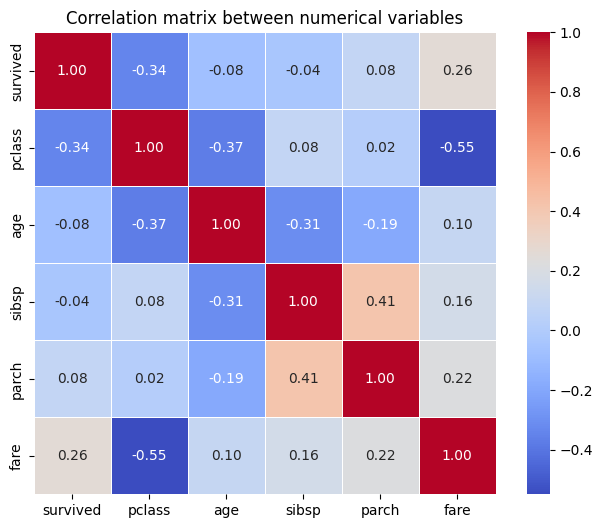

In [10]:
# Filter only the numerical variables
df_numeric = df.select_dtypes(include='number')

# Calculate the correlation matrix
correlation_matrix = df_numeric.corr()
print(correlation_matrix)

# Visualize it as a heatmap to highlight interesting relationships
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", square=True, linewidths=0.5)
plt.title("Correlation matrix between numerical variables")
plt.show()

## 🧠 Analysis conclusions:

* More women survived than men.
* First-class passengers had a higher survival rate.
* Age and fare contain extreme values that may require treatment.
* Some important missing values should be imputed before modeling.

Visual and exploratory analysis is key to making informed decisions at later stages such as preprocessing or modeling.